# Week2 多重比较 和 Two-way ANOVA

# 习题1 多重比较

## 背景描述

我们想要分析三种类型的巧克力对心血管健康的影响,经过第一周实验One-Way ANOVA模型的分析，我们已经得到了以下结论：

- One-way ANOVA模型判断出了 3 种巧克力对心血管健康的影响存在差异；
- 该实验满足了（1）独立（2）方差齐性 以及（3）正态性，因此用One-way ANOVA模型较为恰当；
- 食用这 3 种巧克力 1h 后血浆的总抗氧能力均值的估计值分别为：116.058, 100.7, 100.183；其方差的估计值为：10.43

接下来比较任意两个水平的均值间有无明显差异，也即对其进行多重比较。

## 数据描述

同第一周实验内容

注：这里使用 $\alpha=0.05$ 的显著性水平

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats # 统计函数
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#显著性水平
alpha = 0.05
#因子
a = 3
#水平，重复次数
m = 12
df=pd.read_csv('D:\\mycode\\Untitled Folder\\可视化code\\统计学习方法\\HW2\\Project1.csv')
#提取所需要的列
df = df[['Chocolate','Capacity']]
#构建根据不同种类区分的group
data = df.values 
Group = [data[data[:,0] == atype,1] for atype in [1, 2, 3]]

### Q1: 用Tukey方法，通过直接调用 statmodels 库中的 pairwise_tukeyhsd() 函数比较p值，比较 3 种巧克力对心血管健康的影响两两是否存在差异.


使用 statmodels 库中的 <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.htm">pairwise_tukeyhsd()</a> 函数进行Tukey检验

原假设：
$$H_0^{i j}: \mu_i = \mu_j , 1\le i < j \le 3 $$

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2 -15.3583 0.001 -18.5935 -12.1231   True
     1      3  -15.875 0.001 -19.1102 -12.6398   True
     2      3  -0.5167   0.9  -3.7519   2.7185  False
-----------------------------------------------------




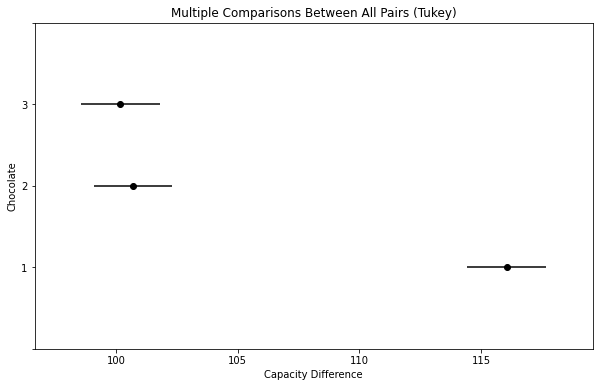

In [2]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['Capacity'], groups=df['Chocolate'], alpha=alpha)

#display results
print(tukey)

tukey.plot_simultaneous(ylabel= 'Chocolate', xlabel= 'Capacity Difference')
print('\n')

可以得到类型1、类型2和类型1、类型3均值之间差异的P值为0.001，小于显著性水平0.05，故拒绝原假设，认为两者均值存在显著差异。

类型2、类型3均值之间差异的P值0.9，大于显著性水平0.05，接受原假设，认为两者之间均值不存在显著差异。

### Q2: 用蒙特卡洛随机模拟分布的方式，确定 $t$ 化极差统计量的分位数 $q_{1-\alpha}(a, df)$，计算临界值(critical value) $c = q_{1-\alpha}(a, df) \hat{\sigma}/\sqrt{m}$，再将每组样本均值的差与临界值比较，从而判断 3 种巧克力对心血管健康的影响两两是否存在差异

先用蒙特卡洛随机模拟分布的方式，确定 $t$ 化极差统计量的分位数 $q_{1-\alpha}(a, df)$

In [3]:
import numpy as np                                                         
q=[]
#用蒙特卡洛随机模拟分布
for n in range(100000): 
    random =np.random.standard_normal(a)
    random.sort()
    min=random[0]
    max=random[a-1]
    y=np.random.chisquare(a*m-a, 1)
    q.append((max - min) / ((y/(a*m-a))**0.5))
q.sort()
#确定t化极差统计量的分位数
t=q[9499]
print(t)

[0.60174261]


计算计算临界值c

In [4]:
mu = [round(np.mean(Group[i]), 3) for i in range(a)]
sse = 0
list_type=[1,2,3]
for i in range(a):
    se = 0
    list_ = data[data[:,0] == list_type[i],1]
    for j in range(m):
        se += (list_[j] - mu[i]) ** 2
    sse += se
var = round(sse / (a * (m - 1)),2) 

c=t*(var**0.5)/(m**0.5)
print(c)

[0.56099927]


将每组样本均值的差与临界值比较，从而判断 3 种巧克力对心血管健康的影响两两是否存在差异

In [5]:

t12=abs(mu[0]-mu[1])
t13=abs(mu[0]-mu[2])
t23=abs(mu[1]-mu[2])
if t12 < c:
    print('保留原假设：μ1=μ2')
else:
    print('拒绝原假设：μ1=μ2')  
if t13 < c:
    print('保留原假设：μ1=μ3')
else:
    print('拒绝原假设：μ1=μ3')  
if t23 < c:
    print('保留原假设：μ2=μ3')
else:
    print('拒绝原假设：μ2=μ3')  

拒绝原假设：μ1=μ2
拒绝原假设：μ1=μ3
保留原假设：μ2=μ3


可以得到类型1、类型2和类型1、类型3均值之间差异的大于c值，故拒绝原假设，认为两者均值存在显著差异。

类型2、类型3均值之间差异小于c值，接受原假设，认为类型2、类型3均值不存在显著差异。

---

# 习题2 Two-way ANOVA


## 背景描述
实验研究了操作温度和三种面板玻璃材料对示波器管输出光的影响。
这是一个压力（因子𝐴）水平数 $𝑎=3$，温度（因子𝐵）水平数 $𝑏=3$ 和重复次数 $m=3$ 的双因子实验。

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Glass_Type | 玻璃材料类型 | categorical variable | [1，2，3] |
| （自变量）Temperature |   温度   | continuous variable | [100, 125, 150] |
| （因变量）Light_Output | 输出光 | continuous variable | Real |

## 问题
注：这里使用 $\alpha=0.05$ 的显著性水平

1. 试用Two-way ANOVA模型判断玻璃类型和温度对输出光是否有显著影响.
2. 用适合的残差图，判断该实验用Two-way ANOVA模型是否恰当.
3. 选出一种玻璃类型 使得不论温度高低都能使示波器管的输出光较高.
4. 如何对这种示波器管的输出光进行预测？

## 解决方案

In [6]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

alpha = 0.05
a = 3
b = 3
m = 3

df = pd.read_csv('D:\\mycode\\Untitled Folder\\可视化code\\统计学习方法\\HW2\\Project2.csv')
df.rename(columns={'Glass Type':'Glass_Type'},inplace=True)
df.rename(columns={'Light Output':'Light_Output'},inplace=True)
print(df.head())

data = df.values
list_Glass_Type = [1, 2, 3]
list_Temperature = [100, 125, 150]

df_grouped = df.groupby(['Glass_Type', 'Temperature'])
groups = [[[] for i in range(3)] for j in range(3)]
for i in range(a):
    for j in range(b):
        groups[i][j] = list(df_grouped.get_group((list_Glass_Type[i], list_Temperature[j]))['Light_Output'])
        
groups

   Glass_Type  Temperature  Light_Output
0           1          100           580
1           1          100           568
2           1          100           570
3           2          100           550
4           2          100           530


[[[580, 568, 570], [1090, 1087, 1085], [1392, 1380, 1386]],
 [[550, 530, 579], [1070, 1035, 1000], [1328, 1312, 1299]],
 [[546, 575, 599], [1045, 1053, 1066], [867, 904, 889]]]

### Q1: 试用Two-way ANOVA模型判断玻璃类型和温度对输出光是否有显著影响.

试判断玻璃类型和温度对输出光是否有显著影响.，使用 statmodels 库中的 <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html">anova_lm()</a> 函数进行Two-Way ANOVA。

需要针对以下三组问题进行检验：

其一，判断玻璃类型和温度是否对输出光有交互作用

原假设: $𝐻_{03}:(\alpha\beta)_{ij}=0, \forall i,j$  vs  备择假设：$𝐻_{13}:(\alpha\beta)_{ij} \neq 0, \exists i,j$ 

（如果不存在交互效应，应该用无交互效应的Two-way ANOVA建模）

其二，判断玻璃类型是否对输出光有直接影响

原假设:  $𝐻_{01}:\alpha_1=\alpha_2=\cdots=\alpha_a=0$  vs  备择假设：$𝐻_{11}:\alpha_i \neq 0, \exists i$

其三，判断温度是否对输出光有直接影响

原假设: $𝐻_{02}:\beta_1=\beta_2=\cdots=\beta_b=0$  vs  备择假设：$𝐻_{12}:\beta_j \neq 0, \exists j$  

In [7]:
# two-way ANOVA
model = ols('Light_Output ~ C(Glass_Type) + C(Temperature) + C(Glass_Type):C(Temperature)', df).fit()
anova_results = anova_lm(model)
print('\n双因素方差分析表：\n', anova_results)


双因素方差分析表：
                                 df        sum_sq        mean_sq            F  \
C(Glass_Type)                  2.0  1.508645e+05   75432.259259   206.370554   
C(Temperature)                 2.0  1.970335e+06  985167.259259  2695.259499   
C(Glass_Type):C(Temperature)   4.0  2.905517e+05   72637.925926   198.725707   
Residual                      18.0  6.579333e+03     365.518519          NaN   

                                    PR(>F)  
C(Glass_Type)                 3.886026e-13  
C(Temperature)                5.008957e-23  
C(Glass_Type):C(Temperature)  1.254188e-14  
Residual                               NaN  


由上面的方差分析表可知，在$\alpha=0.05$的水平下:

其一，对玻璃类型和温度的交互因素来说，$p=3.886026e-13<0.05$，所以两者交互作用显著，交互因素对输出光具有显著影响；

其二，对玻璃类型来说，$p=5.008957e-23<0.05$，所以玻璃类型对输出光有显著影响； 

其三，对温度来说，$p=1.254188e-14<0.05$，所以温度对输出光也具有显著影响.



### Q2: 试用适合的残差图，判断该实验用Two-way ANOVA模型是否恰当.

从三个角度进行分析：（1）方差齐性（2）正态性 （3）独立。


#### 1.方差齐次检验

#### 【法1】绘制残差与不同因子水平的关系图，进行残差分析

##### 1.计算输出光数据的残差

In [8]:
# 计算输出光数据的残差

data_res = data.astype(float)
for i in list_Glass_Type:
    for j in list_Temperature:
        cnt = data[(data[:,0] == i) & (data[:,1] == j),2]
        data_res[(data_res[:,0] == i) & (data_res[:,1] == j),2] = cnt-np.mean(cnt)
df = pd.DataFrame(data_res, columns = ['Glass_Type', 'Temperature', 'Light_Output'])
print(df.head())

res = data_res[:, 2]

   Glass_Type  Temperature  Light_Output
0         1.0        100.0      7.333333
1         1.0        100.0     -4.666667
2         1.0        100.0     -2.666667
3         2.0        100.0     -3.000000
4         2.0        100.0    -23.000000


2.残差与不同因子水平的关系图

1）残差与玻璃类型的关系图

Text(0, 0.5, 'e_ijk')

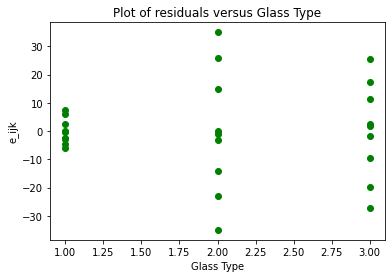

In [9]:
# 残差对玻璃类型的关系图

y3 = data_res[:,0]
plt.scatter(y3, res, c = 'green')
plt.title('Plot of residuals versus Glass Type')
plt.xlabel('Glass Type')
plt.ylabel('e_ijk')

上图显示出方差的不等性：玻璃类型为第一种时，比其他情况下方差要明显小，第二种玻璃类型方差最大。


   2) 残差与温度的关系图

Text(0, 0.5, 'e_ijk')

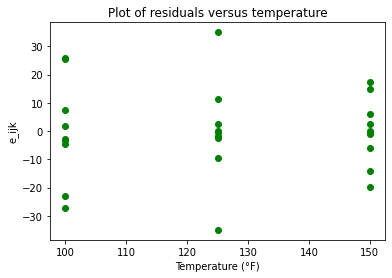

In [10]:
# 残差对温度的关系图
y4 = data_res[:,1]
plt.scatter(y4, res, c = 'green')
plt.title('Plot of residuals versus temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('e_ijk')

上图显示出方差微弱的不等性：温度为 125℉ 时，比其他情况下方差大。

3) 残差与预测值的关系图

Text(0, 0.5, 'e_ijk')

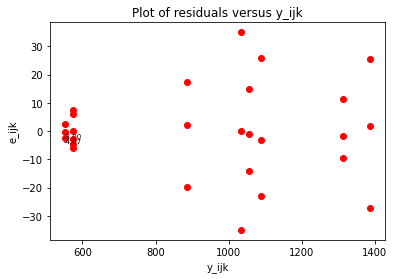

In [11]:
# 残差与预测值的关系图
# 使用每一组的均值作为该组的预测值
y2 = []
for i in list_Glass_Type:
    for j in list_Temperature:
        for k in range(m):
            y2.append(np.mean(data[(data[:,0] == i) & (data[:,1] == j), 2]))
plt.scatter(y2, res, c = 'red')
plt.text(y2[0], res[1], '%.2f' % float(res[1]), ha='center', va= 'bottom', fontsize=7)
plt.text(y2[0], res[3], '%.2f' % float(res[3]), ha='center', va= 'bottom', fontsize=7)
plt.title('Plot of residuals versus y_ijk')
plt.xlabel('y_ijk')
plt.ylabel('e_ijk')

由上图可以看出，当输出光增加时，残差方差有微弱的增长趋势。基本满足方差齐性。

#### 【法2】利用Bartlett检验

In [12]:
# 用Bartlett检验进行方差齐性检验
stats.bartlett(groups[0][0], groups[0][1], groups[0][2], groups[1][0], groups[1][1], groups[1][2], groups[2][0], groups[2][1], groups[2][2])

BartlettResult(statistic=13.438626419880046, pvalue=0.09762263652008246)

Bartlett检验的P值大于 0.05 故接受原假设，即残差具有方差齐性。

#### 【法3】利用Levene检验

In [13]:
# 用Levene检验进行方差齐性检验
stats.levene(groups[0][0], groups[0][1], groups[0][2], groups[1][0], groups[1][1], groups[1][2], groups[2][0], groups[2][1], groups[2][2])

LeveneResult(statistic=1.254770164787511, pvalue=0.32529552216983837)

Levene检验的P值大于 0.05 故接受原假设，即残差具有方差齐性。

#### 2.正态性检验

#### 【法1】绘制残差的正态概率图，进行残差分析


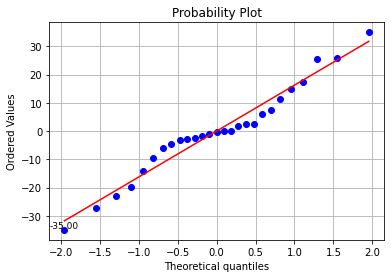

In [14]:
# 残差的正态概率图
res = data_res[:, 2]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [15]:
print(osm[1])

[-35.         -27.33333333 -23.         -19.66666667 -14.
  -9.66666667  -6.          -4.66666667  -3.          -2.66666667
  -2.33333333  -1.66666667  -1.          -0.33333333   0.
   0.           1.66666667   2.33333333   2.66666667   6.
   7.33333333  11.33333333  15.          17.33333333  25.66666667
  26.          35.        ]


由上图可以看出，总体上来看，无特别的证据说明违背数据正态性，分布是近似正态的
 

#### 【法2】利用Shapiro-Wilk检验

In [16]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal = stats.shapiro(res)
pVal

0.5236809253692627

W检验的P值约为 0.52，大于指定的显著性水平 0.05。故认为残差来自服从正态分布的总体。  

#### 3. 独立性检验
Durbin-Watson 检验，又称 DW 检验，是用来检验回归分析中残差的一阶自相关性的(尤其针对时间序列数据)。在本实验中，数据不是时间序列数据，但也可以进行检验
各残差的相关性方程为：$e_i = \rho * e_{i-1} + v_i$，检验的原假设为：$\rho = 0$，备择假设为：$\rho \neq 0$  
检验统计量为：$d = \frac{\sum^T_{t=2}\quad(e_i-e_{i-1})^2}{\sum^T_{t=1}\quad e_i^2}$  
由于d近似等于2(1-$\rho$),该统计量值越接近 2 越好，一般在 1~3 之间说明没问题，小于 1 这说明残差存在自相关性（有临界值表可以查）。  
若没有通过 DW 检验，则需要修改模型或对数据进行处理。

In [17]:
# 用Durbin-Watson检验进行独立性检验
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno
dw = durbin_watson(res)
print('Durbin-Watson检验的统计量为：',dw)

Durbin-Watson检验的统计量为： 2.2731279764920442


Durbin-Watson检验的统计量约为：2.27，非常接近2，在 1~3 之间，故没有违反独立性的假定。 

#### 综上三个方面，可以知道该实验用Two-way ANOVA模型是恰当的

### Q3. 选出一种玻璃类型 使得不论温度高低都能使示波器管的输出光较高.

为了选出一种玻璃类型，使得不论温度高低都能使示波器管的输出光较高，进行固定效应模型分析。

   Glass_Type  Temperature  Light_Output_avg
0         1.0        100.0        572.666667
1         1.0        100.0        572.666667
2         1.0        100.0        572.666667
3         2.0        100.0        553.000000
4         2.0        100.0        553.000000


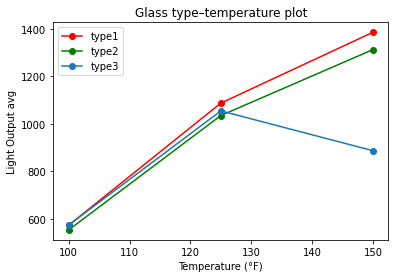

In [18]:
# 固定效应模型分析
data_avg = data.astype(float) * 1

for i in list_Glass_Type:
    for j in list_Temperature:
        cnt = data[(data[:,0] == i) & (data[:,1] == j),2]
        data_avg[(data_avg[:,0] == i) & (data_avg[:,1] == j),2] = np.mean(cnt)
df = pd.DataFrame(data_avg, columns = ['Glass_Type', 'Temperature', 'Light_Output_avg'])
print(df.head())

type1 = data_avg[[0,9,18], 2]
type2 = data_avg[[3,12,21], 2]
type3 = data_avg[[6,15,24], 2]
c1 = pd.Series(type1, index = list_Temperature, name = 'type1')
c2 = pd.Series(type2, index = list_Temperature, name = 'type2')
c3 = pd.Series(type3, index = list_Temperature, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', marker = 'o', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', marker = 'o', label = 'type2')
plt.plot(df.iloc[:,2], marker = 'o', label = 'type3')
plt.title('Glass type–temperature plot')
plt.xlabel('Temperature (°F)')
plt.ylabel('Light Output avg')
plt.legend(['type1', 'type2', 'type3'])

上图绘制了每一种处理组合的平均响应图，类型 1,2 线段基本平行，所以交互作用不显著。一般来说，不管是什么玻璃类型，在低温处的示波器管的输出光都较低。从低温变化至中等温度时，三种玻璃类型都使得输出光逐渐升高。从中等温度变至高温时，玻璃类型 1 与玻璃类型 2 生产的示波器管的输出光逐渐增加，且玻璃类型1的输出光高于玻璃类型类型2的输出光，而由玻璃类型 3 生产的示波器管的输出光下降。因此如果我们希望不论温度高低都能使示波器管的输出光较高，玻璃类型 1 给出了最好的结果。 

### Q4. 如何对这种示波器管的输出光进行预测？

一般地，线性回归方法可用于为实验数据拟合相应的模型。

变量的变换规则:

$A$ 表示温度因子的主效应。由于温度是定量的，有 3 个水平：低、中、高(100℉， 125℉ ， 150℉ )。对应的温度水平分别为 $A = −1，0，+1$。
我们可考虑计算线性的和二次的温度效应，以便研究温度怎样影响电池寿命，分量 $A, A^2$ 分别表示温度因子的一次效应、二次效应。

$B$ 表示玻璃类型因子的主效应。由于玻璃类型是定性的，有 3 个水平。变量 $B[1]$ 和 $B[2]$ 被认为是示性变量（indicator variable），其定义为: 

| | 1 | 2 | 3 |  
| :--------: | :--------: | :--------: | :---------: | 
| $B[1]$ |   1   |   0   |   -1   |  
| $B[2]$ |   0   |   1   |   -1   |


这里我们画出响应曲线（response curve）可以得到响应变量与定量因子——温度的关系。

$$LightOutput = \beta_0+\beta_1A+\beta_2B_1+\beta_3B_2+\beta_4A^2+\beta_5AB_1+\beta_6AB_2+\beta_7A^2B_1+\beta_8A^2B_2$$


In [19]:
# construct variables
list_A = [-1, 0, 1]
list_B1 = [1, 0, -1]
list_B2 = [0, 1, -1]
A = data[:,1] * 1
B1 = B2 = data[:, 0]
for i in range(3):
    A = [list_A[i] if j == list_Temperature[i] else j for j in A]
    B1 = [list_B1[i] if j == list_Glass_Type[i] else j for j in B1]
    B2 = [list_B2[i] if j == list_Glass_Type[i] else j for j in B2]
AA = [A[k] ** 2 for k in range(len(A))]
AB1 = [A[k] * B1[k] for k in range(len(A))]
AB2 = [A[k] * B2[k] for k in range(len(A))]
AAB1 = [AA[k] * B1[k] for k in range(len(A))]
AAB2 = [AA[k] * B2[k] for k in range(len(A))]
df = pd.DataFrame(A, columns = ['A'])
df['B1'] = B1
df['B2'] = B2
df['AA'] = AA
df['AB1'] = AB1
df['AB2'] = AB2
df['AAB1'] = AAB1
df['AAB2'] = AAB2
df['LightOutput'] = data[:,2]
print(df.head())

#train the model
model = ols('LightOutput ~ A + B1 + B2 + AA + AB1 + AB2 + AAB1 + AAB2',df).fit()
param = model.params
model.summary()

   A  B1  B2  AA  AB1  AB2  AAB1  AAB2  LightOutput
0 -1   1   0   1   -1    0     1     0          580
1 -1   1   0   1   -1    0     1     0          568
2 -1   1   0   1   -1    0     1     0          570
3 -1   0   1   1    0   -1     0     1          550
4 -1   0   1   1    0   -1     0     1          530


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LightOutput   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     824.8
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.78e-21
Time:                        20:52:35   Log-Likelihood:                -112.51
No. Observations:                  27   AIC:                             243.0
Df Residuals:                      18   BIC:                             254.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1059.0000      6.373    166.174      0.000    1045.611    1072.389
A            314.4444      4.506     69.779      0.000     304.977     323.912
B1            28.3333      9.013      3.144      0.006       9.399      47.268
B2           -24.0000      9.013     -2.663      0.016     -42.935      -5.065
AA          -178.2222      7.805    -22.834      0.000    -194.620    -161.824
AB1           92.2222      6.373     14.471      0.000      78.833     105.611
AB2           65.5556      6.373     10.287      0.000      52.167      78.944
AAB1          70.2222     11.038      6.362      0.000      47.032      93.412
AAB2          76.2222     11.038      6.905      0.000      53.032      99.412
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.035
Skew:                           0.009   Prob(JB):                        0.983
Kurtosis:                       3.175   Cond. No.                         5.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$LightOutput = +1059.00-314.44 *A-28.33 *B[1]-24.00 *B[2]-178.22 *A^2+92.22 *AB[1]-65.56 *AB[2]+70.22 *A^2B[1]-76.22A^2B[2]$

模型的分组

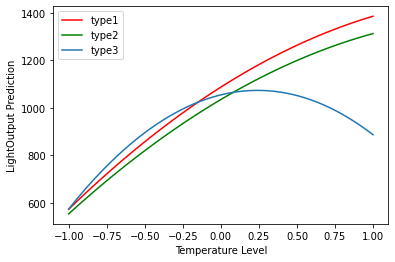

In [20]:
# 拟合响应曲线
temp = np.linspace(-1, 1)

# 玻璃类型示性变量取分组对应的值
LightOutput_type1 = param[0] + param[1] * temp + param[2] * list_B1[0] + param[3] * list_B2[0] + param[4] * (temp ** 2) + param[5] * temp * list_B1[0] + param[6] * temp * list_B2[0] + param[7] * (temp ** 2) * list_B1[0] + param[8] * (temp ** 2) * list_B2[0]
LightOutput_type2 = param[0] + param[1] * temp + param[2] * list_B1[1] + param[3] * list_B2[1] + param[4] * (temp ** 2) + param[5] * temp * list_B1[1] + param[6] * temp * list_B2[1] + param[7] * (temp ** 2) * list_B1[1] + param[8] * (temp ** 2) * list_B2[1]
LightOutput_type3 = param[0] + param[1] * temp + param[2] * list_B1[2] + param[3] * list_B2[2] + param[4] * (temp ** 2) + param[5] * temp * list_B1[2] + param[6] * temp * list_B2[2] + param[7] * (temp ** 2) * list_B1[2] + param[8] * (temp ** 2) * list_B2[2]

c1 = pd.Series(LightOutput_type1, index = temp, name = 'type1')
c2 = pd.Series(LightOutput_type2, index = temp, name = 'type2')
c3 = pd.Series(LightOutput_type3, index = temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', label = 'type2')
plt.plot(df.iloc[:,2], label = 'type3')
plt.xlabel('Temperature Level')
plt.ylabel('LightOutput Prediction')
plt.legend(['type1', 'type2', 'type3'])


In [21]:
#玻璃类型1
print(param[0]  + param[2] * list_B1[0] + param[3] * list_B2[0])
print(param[1]+ param[5] * list_B1[0] + param[6] * list_B2[0])
print(param[7] * list_B1[0] + param[8] * list_B2[0]+ param[4])
#玻璃类型2
print(param[0]  + param[2] * list_B1[1] + param[3] * list_B2[1])
print(param[1]+ param[5] * list_B1[1] + param[6] * list_B2[1])
print(param[7] * list_B1[1] + param[8] * list_B2[1]+ param[4])
#玻璃类型3
print(param[0]  + param[2] * list_B1[2] + param[3] * list_B2[2])
print(param[1]+ param[5] * list_B1[2] + param[6] * list_B2[2])
print(param[7] * list_B1[2] + param[8] * list_B2[2]+ param[4])

1087.3333333333346
406.66666666666663
-107.99999999999878
1034.9999999999986
380.0000000000001
-102.00000000000165
1054.6666666666667
156.66666666666657
-324.66666666666634


玻璃类型为 1：  
$y = 1087.33 + 406.67 ∗ TempLevel − 108.00 ∗ TempLevel^2 $  
玻璃类型为 2：  
$y = 1035.00 + 380.00 ∗ TempLevel − 102.00 ∗ TempLevel^2$  
玻璃类型为 3：  
$y = 1054.67 + 156.67 ∗ TempLevel − 324.67 ∗ TempLevel^2$  

上图为这 3 个预测公式声称的响应曲线。